<a href="https://colab.research.google.com/github/sarjil77/Customer-segmentation-ML/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [ ]:
# loading the data to pandas dataframe
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:


# # Assuming 'data' is your dataset and 'labels' are the cluster labels assigned by your clustering algorithm
# silhouette_avg = silhouette_score(customer_data, labels)


In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


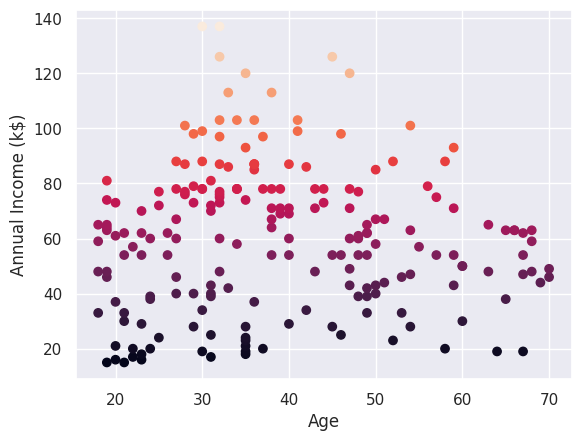

In [ ]:
# @title Annual Income vs Age

import matplotlib.pyplot as plt
plt.scatter(customer_data['Age'], customer_data['Annual Income (k$)'], c=customer_data['Annual Income (k$)'])
plt.xlabel('Age')
_ = plt.ylabel('Annual Income (k$)')

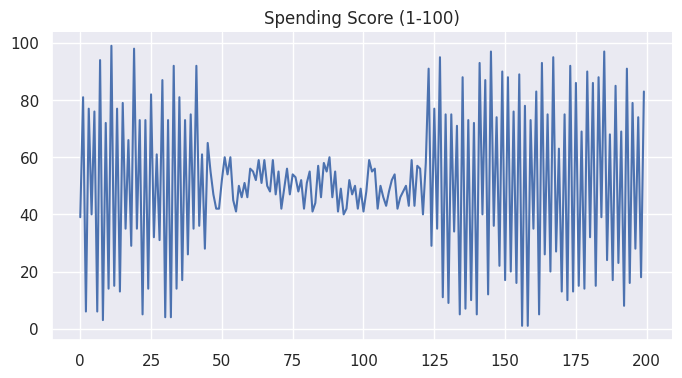

In [ ]:
# @title Spending Score (1-100)

from matplotlib import pyplot as plt
customer_data['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

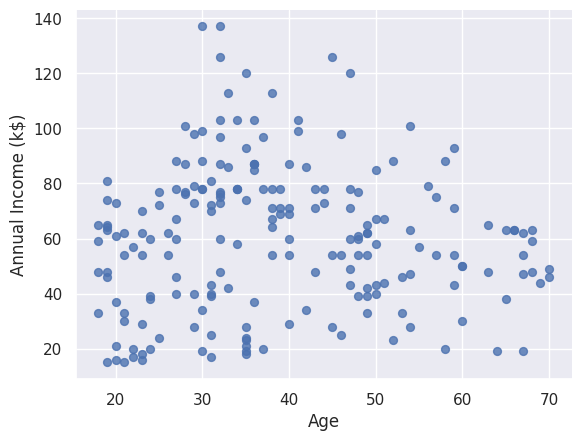

In [ ]:
# @title Age vs Annual Income (k$)

from matplotlib import pyplot as plt
customer_data.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Choosing the Annual income column & Spending score column


In [ ]:
X = customer_data.iloc[:,[3,4]].values

Choosing the number of clusters

WCSS --> within clusters sum of squares

In [ ]:
# finding wcss value for different number of clusters

wcss = []

for i in range(2,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state = 42)
  kmeans.fit(X)
  labels = kmeans.labels_
  wcss.append(kmeans.inertia_)
  silhouette_avg = silhouette_score(X, labels)
  print(f"For {i} clusters, the average silhouette score is :", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 2 clusters, the average silhouette score is : 0.2968969162503008
For 3 clusters, the average silhouette score is : 0.46761358158775435
For 4 clusters, the average silhouette score is : 0.4931963109249047
For 5 clusters, the average silhouette score is : 0.553931997444648
For 6 clusters, the average silhouette score is : 0.53976103063432
For 7 clusters, the average silhouette score is : 0.5264283703685728


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 8 clusters, the average silhouette score is : 0.45827056882053113


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 9 clusters, the average silhouette score is : 0.4553729779390266
For 10 clusters, the average silhouette score is : 0.45925273534781125


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


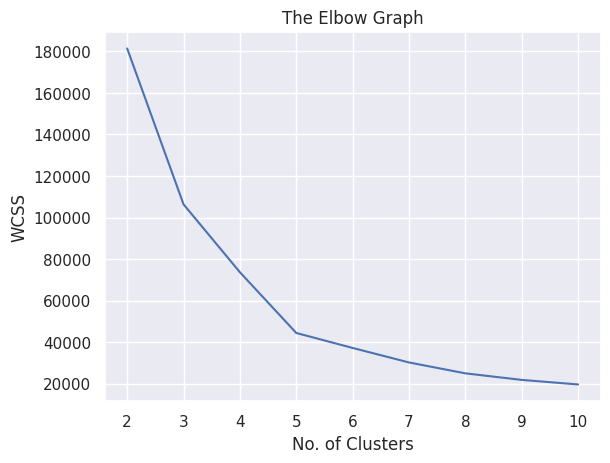

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(2,11), wcss)
plt.title('The Elbow Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

optimum number of clusters would be 5

Training the k means clustering model


In [ ]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++', random_state = 0)

# return a label for each datapoint based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Calculate the Davies-Bouldin index
db_index = davies_bouldin_score(X, Y)

In [ ]:
print("The Davies-Bouldin index is:", db_index)

The Davies-Bouldin index is: 0.5725628995597082


 Visualizing all the clusters

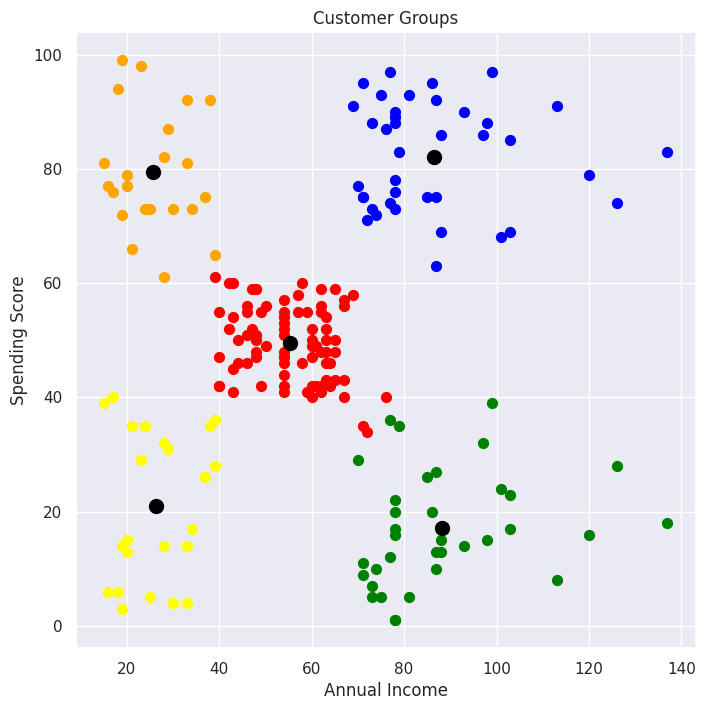

In [ ]:
# plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y == 0,0], X[Y == 0,1], s=50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y == 1,0], X[Y == 1,1], s=50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y == 2,0], X[Y == 2,1], s=50, c = 'blue', label = 'Cluster 3')
plt.scatter(X[Y == 3,0], X[Y == 3,1], s=50, c = 'orange', label = 'Cluster 4')
plt.scatter(X[Y == 4,0], X[Y == 4,1], s=50, c = 'Yellow', label = 'Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c ='black', label = 'Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

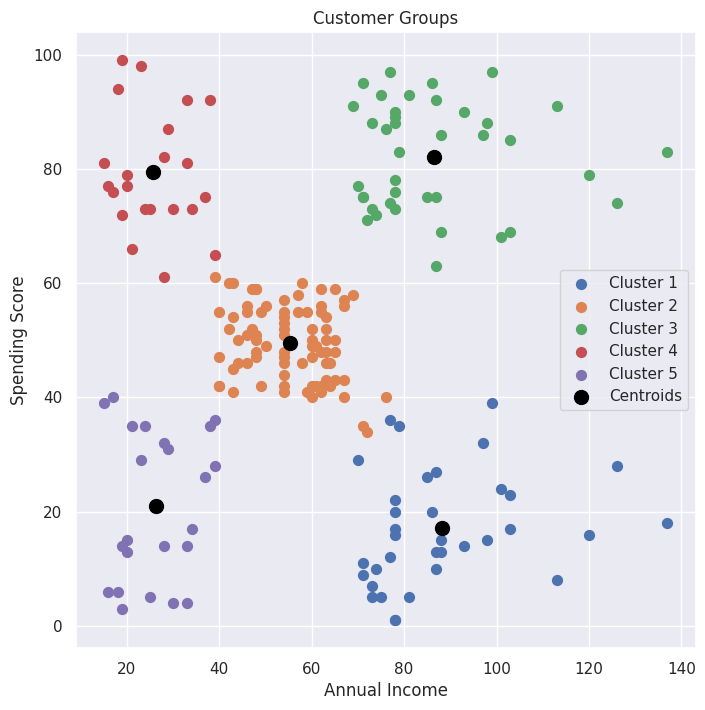

In [ ]:
# Visualizing all the clusters
plt.figure(figsize=(8, 8))
for i in range(kmeans.n_clusters):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], s=50, label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()